**KNN ON TITANIC DATASET WHERE K RANGES FROM 1 TO 267**

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv("train.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [26]:
data1=data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [27]:
encoder = LabelEncoder()
for var in ['Sex', 'Embarked']:
    data1[var] = encoder.fit_transform(data[var])
data1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import matplotlib.pyplot as plt

In [29]:
y=data1['Pclass']
x=data1.drop(['Pclass'], axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

just used a for loop for 267 k values iteration

In [32]:
scores = []
k_list = range(1,267)
for k in k_list:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  score = knn.score(X_test, y_test)
  scores.append(score)

In [36]:
scores

[0.8913857677902621,
 0.8651685393258427,
 0.8651685393258427,
 0.8239700374531835,
 0.8314606741573034,
 0.846441947565543,
 0.8426966292134831,
 0.850187265917603,
 0.846441947565543,
 0.8352059925093633,
 0.8202247191011236,
 0.8277153558052435,
 0.8277153558052435,
 0.8202247191011236,
 0.8127340823970037,
 0.8164794007490637,
 0.8164794007490637,
 0.8164794007490637,
 0.8202247191011236,
 0.8202247191011236,
 0.8127340823970037,
 0.797752808988764,
 0.8014981273408239,
 0.7940074906367042,
 0.797752808988764,
 0.7865168539325843,
 0.797752808988764,
 0.7827715355805244,
 0.7790262172284644,
 0.7790262172284644,
 0.7865168539325843,
 0.7827715355805244,
 0.7902621722846442,
 0.7865168539325843,
 0.7790262172284644,
 0.7827715355805244,
 0.7865168539325843,
 0.7902621722846442,
 0.7752808988764045,
 0.7902621722846442,
 0.7827715355805244,
 0.7865168539325843,
 0.7827715355805244,
 0.7865168539325843,
 0.7827715355805244,
 0.7865168539325843,
 0.7752808988764045,
 0.7752808988764045

Text(0, 0.5, 'Accuracy')

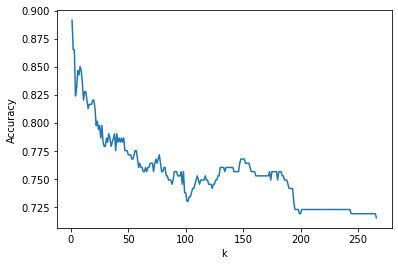

In [33]:
plt.plot(k_list, scores)
plt.xlabel("k")
plt.ylabel("Accuracy")

**SVM ON TITANIC DATASET BY CHANGING DEPENDENT VARIABLES USING A USER-DEFINED FUNCTION**

In [110]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [105]:
features  = ['Survived', 'Sex', 'Embarked', 'Parch', 'SibSp']

In [106]:
#removing the string datatyes
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')

# Handle missing values
data['Age'].fillna(value=data['Age'].mean(), inplace=True)
data.dropna(inplace=True)

# Handle categorical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for var in ['Sex', 'Embarked']:
    data[var] = encoder.fit_transform(data[var])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,0
3,1,1,0,35.0,1,0,53.1000,2
6,0,1,1,54.0,0,0,51.8625,2
10,1,3,0,4.0,1,1,16.7000,2
11,1,1,0,58.0,0,0,26.5500,2


In [112]:
def  dependent_change(y_var):
  X_train, X_test, y_train, y_test = train_test_split(
  data.drop(y_var, axis=1), data[y_var], test_size=0.3, random_state=0)
  clf = svm.SVC(gamma=0.01, C=100)
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  print(accuracy_score(y_test,y_pred, normalize=True))

In [114]:
for y_var in features:
  dependent_change(y_var)

0.5573770491803278
0.5409836065573771
0.47540983606557374
0.639344262295082
0.6885245901639344
